In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics.cluster import rand_score
from sklearn.metrics.cluster import adjusted_rand_score

In [2]:
data = pd.read_csv("1.csv", header=None)
columns=['param1', 'param2', 'param3', 'param4', 'label']
data.columns=[columns]
data = data[:-1]
data

,param1,param2,param3,param4,label
0,0.0,1502,2215,2153,1
1,1.0,1667,2072,2047,1
2,2.0,1611,1957,1906,1
3,3.0,1601,1939,1831,1
4,4.0,1643,1965,1879,1
...,...,...,...,...,...
162495,162500.0,1926,2382,2072,7
162496,162500.0,1927,2388,2074,7
162497,162500.0,1930,2383,2074,7
162498,162500.0,1929,2385,2076,7


In [3]:
# Class labels
# 1: Working at Computer
# 2: Standing Up, Walking and Going up\down stairs
# 3: Standing
# 4: Walking
# 5: Going Up\Down Stairs
# 6: Walking and Talking with Someone
# 7: Talking while Standing

In [4]:
data['label'].value_counts()

(label,)
7           83748
1           33677
4           26860
3           11179
5            3191
6            2917
2             928
dtype: int64

In [5]:
data_X = data[['param1', 'param2', 'param3', 'param4']]
data_Y = data.label

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data_X, data_Y, test_size=0.3, random_state=0)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(113750, 4) (113750, 1) (48750, 4) (48750, 1)


In [7]:
y_train = np.array(y_train)
y_train = y_train.squeeze()

y_test = np.array(y_test)
y_test = y_test.squeeze()

# KMeans Clustering

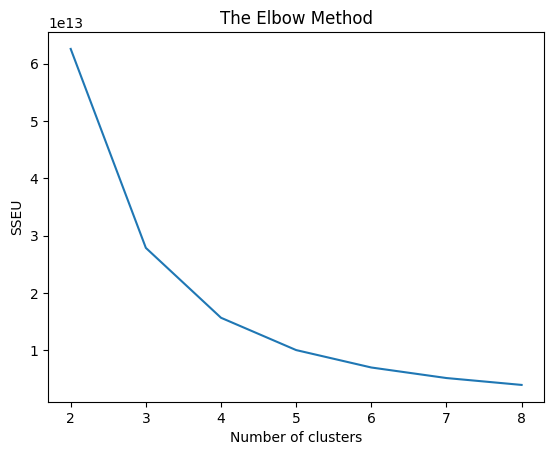

In [8]:
SSEU = []
for i in range(7):
    kmeans = KMeans(n_clusters=i+2)
    kmeans.fit(X_train)
    SSEU.append(kmeans.inertia_)

plt.plot(range(2, 9), SSEU)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSEU')
plt.show()

In [9]:
k = [3, 4, 5, 6, 7, 8, 9, 10]

for i in k:
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X_train)

    labels = kmeans.labels_

    correct_labels = sum(y_train == labels)

    print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y_train.size))
    
    print("Rand Score: ", rand_score(y_train, labels))
    print("Adjusted Rand Score: ", adjusted_rand_score(y_train, labels))

    print('Accuracy score of {}NN: {}'. format(i , correct_labels/float(y_train.size)))
    print('-----------------------------------------------')

Result: 634 out of 113750 samples were correctly labeled.
Rand Score:  0.7359165998706039
Adjusted Rand Score:  0.4087489117509555
Accuracy score of 3NN: 0.005573626373626374
-----------------------------------------------
Result: 2757 out of 113750 samples were correctly labeled.
Rand Score:  0.8027426891230248
Adjusted Rand Score:  0.5303152369592604
Accuracy score of 4NN: 0.024237362637362637
-----------------------------------------------
Result: 5768 out of 113750 samples were correctly labeled.
Rand Score:  0.7884062541015938
Adjusted Rand Score:  0.4762213648145746
Accuracy score of 5NN: 0.05070769230769231
-----------------------------------------------
Result: 10754 out of 113750 samples were correctly labeled.
Rand Score:  0.7524277825120839
Adjusted Rand Score:  0.37058773317581095
Accuracy score of 6NN: 0.09454065934065935
-----------------------------------------------
Result: 0 out of 113750 samples were correctly labeled.
Rand Score:  0.740997472456949
Adjusted Rand Scor

# Agglomerative Clustering

In [10]:
from sklearn.cluster import AgglomerativeClustering

In [11]:
clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
clustering.fit_predict(X_train[0:500])
a = clustering.labels_
a.size

500

In [13]:
k = [3, 4, 5, 6, 7, 8, 9, 10]

for i in k:
    aggclustering = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')
    aggclustering.fit_predict(X_train[0:500])

    labels = aggclustering.labels_

    correct_labels = sum(y_train[0:500] == labels)

    print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y_train.size))
    
    print("Rand Score: ", rand_score(y_train[0:500], labels))
    print("Adjusted Rand Score: ", adjusted_rand_score(y_train[0:500], labels))

    print('Accuracy score of {}NN: {}'. format(i, correct_labels/float(y_train.size)))
    print('-----------------------------------------------')

Result: 0 out of 113750 samples were correctly labeled.
Rand Score:  0.8766172344689379
Adjusted Rand Score:  0.7265815673234776
Accuracy score of 3NN: 0.0
-----------------------------------------------
Result: 0 out of 113750 samples were correctly labeled.
Rand Score:  0.7894188376753507
Adjusted Rand Score:  0.5000123769414492
Accuracy score of 4NN: 0.0
-----------------------------------------------
Result: 3 out of 113750 samples were correctly labeled.
Rand Score:  0.840064128256513
Adjusted Rand Score:  0.6012989423688332
Accuracy score of 5NN: 2.6373626373626374e-05
-----------------------------------------------
Result: 3 out of 113750 samples were correctly labeled.
Rand Score:  0.7968577154308617
Adjusted Rand Score:  0.4740439047534634
Accuracy score of 6NN: 2.6373626373626374e-05
-----------------------------------------------
Result: 3 out of 113750 samples were correctly labeled.
Rand Score:  0.775310621242485
Adjusted Rand Score:  0.4068384673214588
Accuracy score of 7

Clearly there is a lot of difference in accuracies between KMeans and agglomerative clustering. KMeans is obviously performing better on the dataset taken by me.